<a href="https://colab.research.google.com/github/walkerjian/DailyCode/blob/main/Code_Craft_clock_angle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem:
Given a clock time in hh:mm format, determine, to the nearest degree, the angle between the hour and the minute hands.

Bonus: When, during the course of a day, will the angle be zero?

##Solution:
To solve the problem, let's first determine how to calculate the angle between the hour and minute hands of a clock given a specific time in hh:mm format.

### Step 1: Calculate the Positions of the Hands

1. **Minute Hand Position**: Each minute, the minute hand moves by 6 degrees (360 degrees / 60 minutes).
   - Therefore, if the minute is `m`, the angle of the minute hand from the 12 o'clock position is $ 6m $ degrees.

2. **Hour Hand Position**: Each hour, the hour hand moves by 30 degrees (360 degrees / 12 hours). Additionally, it moves by 0.5 degrees each minute (30 degrees / 60 minutes).
   - Therefore, if the hour is `h` (in 12-hour format) and the minutes are `m`, the angle of the hour hand from the 12 o'clock position is $ 30h + 0.5m $ degrees.

### Step 2: Calculate the Angle Between the Hands

To find the angle between the two hands of the clock:
- The angle difference can be calculated as:
  $
  \text{Angle} = \left| (30h + 0.5m) - 6m \right|
  $
  Simplifying, we get:
  $
  \text{Angle} = \left| 30h - 5.5m \right|
  $

- However, the angle between two hands should be the smallest angle at the circle, so we take:
  $
  \text{Smallest Angle} = \min(\text{Angle}, 360 - \text{Angle})
  $

### Example Calculation

Consider 3:00. Using our formula:
- Minute hand at 0 degrees (since $ 6 \times 0 = 0 $)
- Hour hand at 90 degrees (since $ 30 \times 3 + 0.5 \times 0 = 90 $)
- Difference = $ |90 - 0| = 90 $ degrees.

### Bonus: Finding When the Hands Overlap

To find when the angle between the hands is zero:
- Set $ \text{Angle} = 0 $ in our formula:
  $
  30h - 5.5m = 0
  $
  Solving for $ m $:
  $
  m = \frac{30h}{5.5}
  $
  $
  m = \frac{60h}{11}
  $
  
This equation gives the minutes past the hour when the hands overlap. Iterating over each hour `h` (where `h` can be from 0 to 11), and solving for `m`, will give us the specific minutes past each hour when the hands overlap.

- However, it should be noted that not all solutions will be valid as `m` should be between 0 and 60 for a valid clock time.

Thus, by applying these calculations, we can determine the angle between the hour and minute hands at any given time, as well as find all the instances when the hands overlap in a 12-hour period.

##Implementation:

In [ ]:
def clock_angle(time_str):
    h, m = map(int, time_str.split(':'))

    # Calculate the angles
    minute_angle = 6 * m
    hour_angle = 30 * (h % 12) + 0.5 * m

    # Calculate the difference
    angle = abs(hour_angle - minute_angle)

    # Find the smallest angle
    smallest_angle = min(angle, 360 - angle)
    return smallest_angle

##Testing:

In [ ]:
# Test the function
time_input = "3:00"
angle = clock_angle(time_input)
print(f"The angle at {time_input} is {angle} degrees.")

The angle at 3:00 is 90.0 degrees.


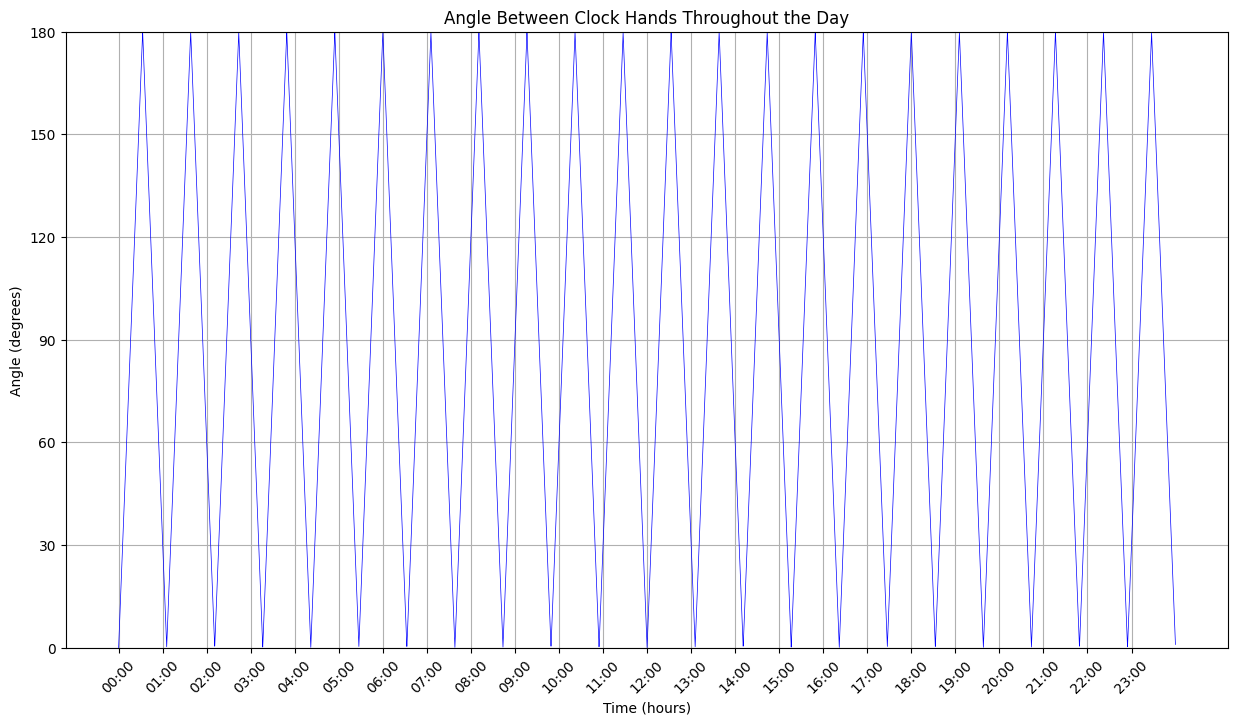

In [ ]:
import matplotlib.pyplot as plt
def generate_day_angles_finer():
    # Prepare for plotting
    times = []
    angles = []

    # Compute angle for every second of the day
    for hour in range(24):
        for minute in range(60):
            for second in range(0, 60, 10):  # Compute every 10 seconds
                angle = clock_angle(hour, minute, second)
                time_label = f"{hour:02d}:{minute:02d}:{second:02d}"
                times.append(time_label)
                angles.append(angle)

    return times, angles

# Generate data with finer resolution
times, angles = generate_day_angles_finer()

# Plotting
plt.figure(figsize=(15, 8))
plt.plot(angles, label='Angle variation', color='blue', linewidth=0.5)
plt.xlabel('Time (hours)')
plt.ylabel('Angle (degrees)')
plt.title('Angle Between Clock Hands Throughout the Day')
xtick_locs = [i * 360 for i in range(24)]  # Position for each hour mark
xtick_labels = [f"{i:02d}:00" for i in range(24)]  # Labels for each hour
plt.xticks(xtick_locs, xtick_labels, rotation=45)  # Set custom x-tick marks
plt.yticks(range(0, 181, 30))  # Set y-tick marks every 30 degrees from 0 to 180
plt.ylim(0, 180)  # Limit y-axis to show only 0 to 180 degrees
plt.grid(True)
plt.show()


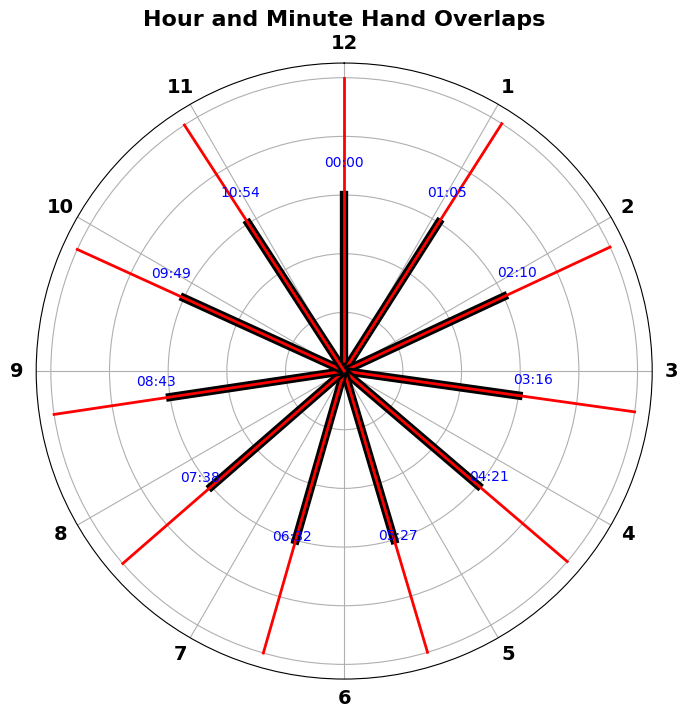

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def times_when_hands_coincide():
    coincidences = []
    for h in range(12):
        m = (60 * h) / 11
        if m < 60:
            coincidences.append((h, int(m)))
    return coincidences

def annotated_polar_clock_plot(coincidences):
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
    ax.set_theta_direction(-1)
    ax.set_theta_zero_location('N')

    clock_hours = np.arange(0, 12, 1)
    clock_hour_labels = ['12', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']
    ax.set_xticks((clock_hours / 12) * 2 * np.pi)
    ax.set_xticklabels(clock_hour_labels, fontsize=14, weight='bold')

    for h, m in coincidences:
        angle_rad = (h + m / 60) / 12 * 2 * np.pi
        # Hour hand: shorter, black
        ax.plot([angle_rad, angle_rad], [0, 0.6], 'black', linewidth=6)
        # Minute hand: longer, red
        ax.plot([angle_rad, angle_rad], [0, 1], 'red', linewidth=2)
        # Annotate the time of coincidence
        ax.annotate(f"{h:02d}:{m:02d}", (angle_rad, 0.65), textcoords="offset points", xytext=(0,10), ha='center', color='blue')

    ax.set_yticklabels([])  # Remove radial labels
    plt.title("Hour and Minute Hand Overlaps", fontsize=16, weight='bold')
    plt.show()

coincidences = times_when_hands_coincide()
annotated_polar_clock_plot(coincidences)
